<a href="https://colab.research.google.com/github/Sukhmanpreetkaur18/Data-Science-Project/blob/main/Copy_of_Diabetes_(DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I’m predicting whether a patient has diabetes or not using a dataset that contains different health and lifestyle factors.
# The model I’m using is a Decision Tree Classifier, which helps in understanding how different factors like glucose level, BMI, and blood pressure affect the chances of diabetes.

##Importing Required Libraries

# These are the basic Python libraries used for data analysis, visualization, and machine learning.

In [17]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the Dataset

# Now I’ll load my dataset which contains patient details.


In [18]:
#loading dataset
print("upload your csv file... ")
uploaded = files.upload()
filename= list(uploaded.keys())[0]

upload your csv file... 


Saving synthetic_diabetes_5000.csv to synthetic_diabetes_5000 (1).csv


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copying path

In [20]:
df=pd.read_csv("/content/synthetic_diabetes_5000.csv")

In [21]:
df

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,HbA1c,Insulin,Family_History,Physical_Activity,Smoking,Alcohol,Diabetes
0,1,69,Male,32.1,89,155,7.6,75.3,Yes,High,Yes,No,0
1,2,32,Female,24.3,89,243,5.5,99.2,Yes,Moderate,No,Yes,0
2,3,89,Male,27.7,152,91,7.5,3.5,Yes,High,No,Yes,0
3,4,78,Male,35.1,107,129,5.5,54.8,Yes,Low,No,No,1
4,5,38,Male,30.1,103,173,5.7,96.7,Yes,Low,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,77,Female,20.5,100,162,6.1,62.5,No,High,Yes,Yes,0
4996,4997,43,Female,25.5,179,237,3.6,51.2,No,Moderate,No,Yes,1
4997,4998,58,Female,34.2,134,188,5.8,54.3,No,Moderate,Yes,No,0
4998,4999,53,Male,29.9,137,201,5.7,61.7,Yes,Moderate,No,No,0


Dataset Overview

# Let’s see the structure, column types, and some basic statistics of the dataset.

In [22]:
print (df.head())
print (df.info())
print (df.describe())

   Patient_ID  Age  Gender   BMI  Blood_Pressure  Glucose_Level  HbA1c  \
0           1   69    Male  32.1              89            155    7.6   
1           2   32  Female  24.3              89            243    5.5   
2           3   89    Male  27.7             152             91    7.5   
3           4   78    Male  35.1             107            129    5.5   
4           5   38    Male  30.1             103            173    5.7   

   Insulin Family_History Physical_Activity Smoking Alcohol  Diabetes  
0     75.3            Yes              High     Yes      No         0  
1     99.2            Yes          Moderate      No     Yes         0  
2      3.5            Yes              High      No     Yes         0  
3     54.8            Yes               Low      No      No         1  
4     96.7            Yes               Low      No      No         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column     

Data Preprocessing

# I removed unnecessary columns and converted categorical features (like Gender, Smoking, Alcohol, etc.) into numerical format using one-hot encoding so the model can understand them.

In [23]:
#Preprocessing

 #removing patient id
df.drop("Patient_ID", axis=1)

# converting categorical data into numerical data
df=pd.get_dummies(df,drop_first=True)
print(df.head())

   Patient_ID  Age   BMI  Blood_Pressure  Glucose_Level  HbA1c  Insulin  \
0           1   69  32.1              89            155    7.6     75.3   
1           2   32  24.3              89            243    5.5     99.2   
2           3   89  27.7             152             91    7.5      3.5   
3           4   78  35.1             107            129    5.5     54.8   
4           5   38  30.1             103            173    5.7     96.7   

   Diabetes  Gender_Male  Family_History_Yes  Physical_Activity_Low  \
0         0         True                True                  False   
1         0        False                True                  False   
2         0         True                True                  False   
3         1         True                True                   True   
4         0         True                True                   True   

   Physical_Activity_Moderate  Smoking_Yes  Alcohol_Yes  
0                       False         True        False  
1     

Splitting Features and Target

# Now I’ll separate the input features (X) and target variable (y), and split them into training and testing data.

In [24]:
#defining features and targets
X = df.drop("Diabetes", axis=1)               #features
y = df["Diabetes"]                            #targets

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42, stratify=y
)

Training the Decision Tree Model

# Here I’m creating and training the Decision Tree model using entropy as the criterion.

In [25]:
#training decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Model Evaluation

# To see how well the model performed, I calculated accuracy, confusion matrix, and classification report.

In [26]:
# evaluating
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))# visualize decision tree


Accuracy: 0.543

Confusion Matrix:
 [[537  10]
 [447   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.98      0.70       547
           1       0.38      0.01      0.03       453

    accuracy                           0.54      1000
   macro avg       0.46      0.50      0.36      1000
weighted avg       0.47      0.54      0.40      1000



Visualizing the Decision Tree

# The decision tree helps us understand how the model makes predictions based on different health conditions.

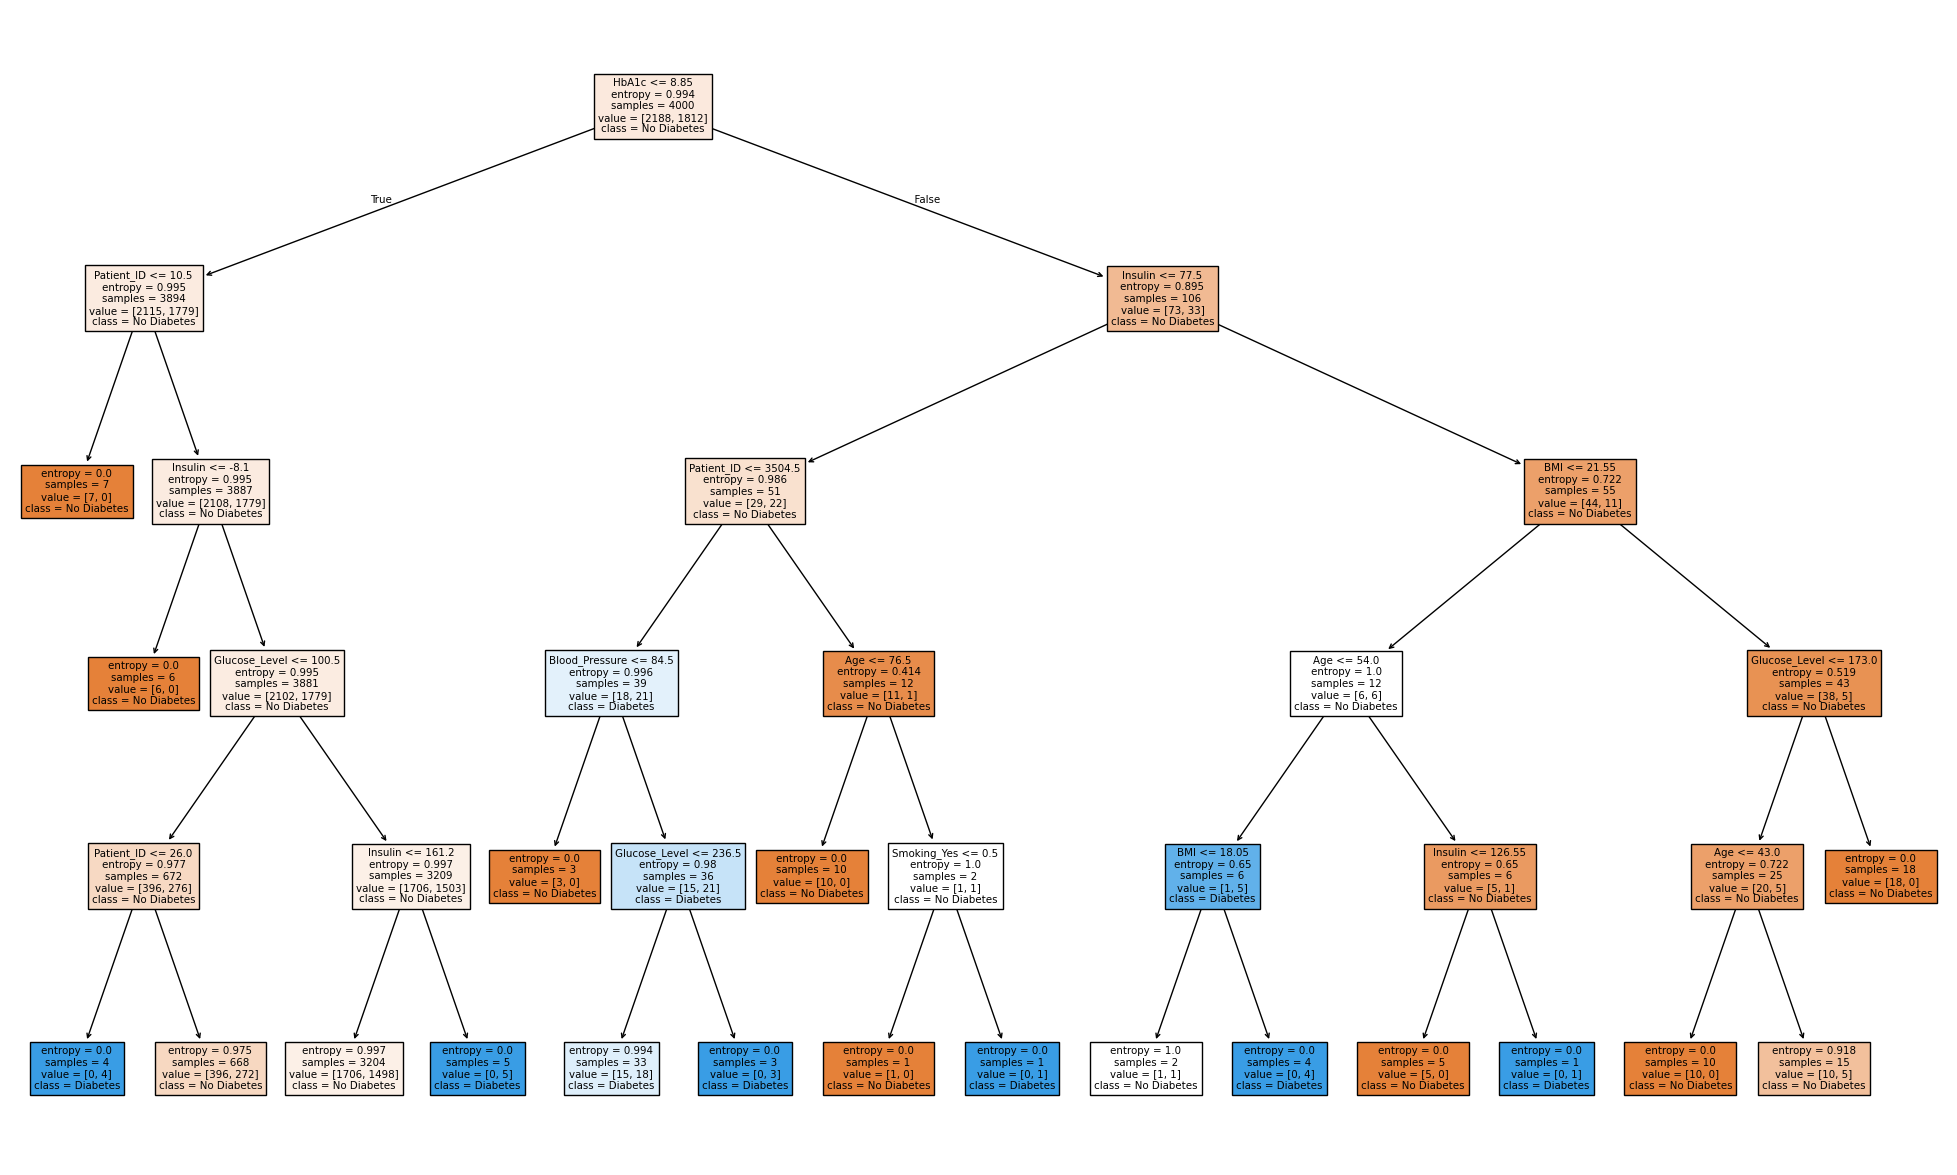

In [27]:
plt.figure(figsize=(25,15))
plot_tree(dt, feature_names=X.columns, class_names=["No Diabetes","Diabetes"], filled=True)
plt.show()

Feature Importance

This graph shows which factors were most important in predicting diabetes.
# Higher bars mean that feature influenced the prediction more strongly.

/tmp/ipython-input-1569005365.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="viridis")


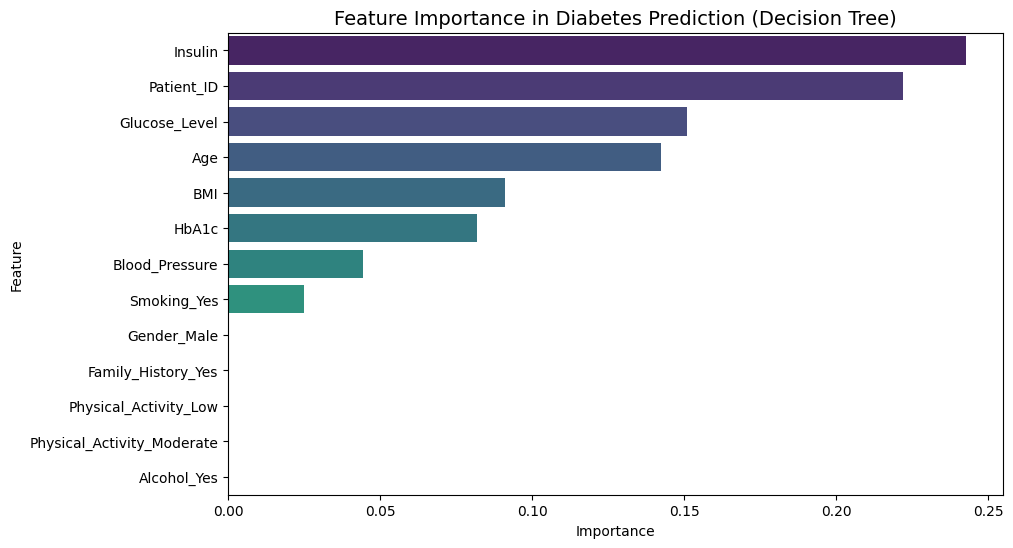

In [28]:
# feature importances from the trained model
importances = dt.feature_importances_
features = X.columns

# Put into a dataframe for sorting
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="viridis")
plt.title("Feature Importance in Diabetes Prediction (Decision Tree)", fontsize=14)
plt.show()

To understand relationships between numerical features, I plotted a correlation heatmap.
# It helps to see which health factors are connected — for example, Glucose, HbA1c, and Insulin levels are usually correlated.

Correlation between different columns:

Diabetes                      1.000000
Alcohol_Yes                   0.021406
Glucose_Level                 0.019464
Family_History_Yes            0.012645
Blood_Pressure                0.011256
Patient_ID                    0.006228
Gender_Male                   0.004104
Physical_Activity_Low        -0.002182
Insulin                      -0.007391
Smoking_Yes                  -0.011998
Age                          -0.013939
Physical_Activity_Moderate   -0.017012
HbA1c                        -0.017922
BMI                          -0.020228
Name: Diabetes, dtype: float64


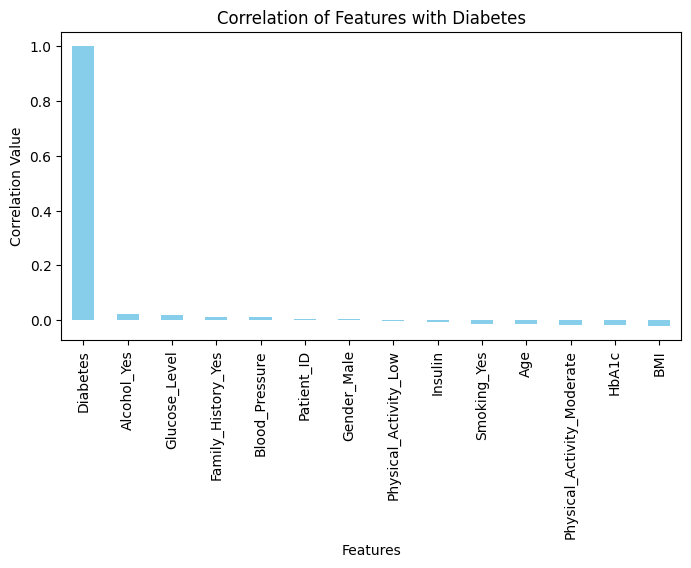

In [29]:
# Checking correlation between columns
correlation = df.corr()
print("Correlation between different columns:\n")
print(correlation["Diabetes"].sort_values(ascending=False))

# Plotting a simple bar graph for correlation with Diabetes
correlation["Diabetes"].sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title("Correlation of Features with Diabetes")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.show()

Glucose Level Comparison (Simple & Basic)

Here I compared the average glucose level of diabetic and non-diabetic patients.
## Instead of a histogram, I made a simple bar graph using the .plot() function.

Diabetes
0    158.646435
1    160.674172
Name: Glucose_Level, dtype: float64


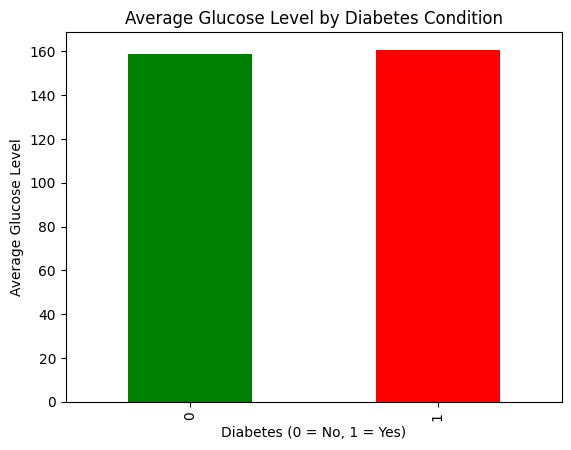

In [30]:
avg_glucose = df.groupby("Diabetes")["Glucose_Level"].mean()
print(avg_glucose)

avg_glucose.plot(kind='bar', color=['green', 'red'])
plt.title("Average Glucose Level by Diabetes Condition")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.show()

I wanted to see how Glucose Level is distributed among diabetic and non-diabetic patients.
# The plot clearly shows that people with diabetes tend to have higher glucose levels.

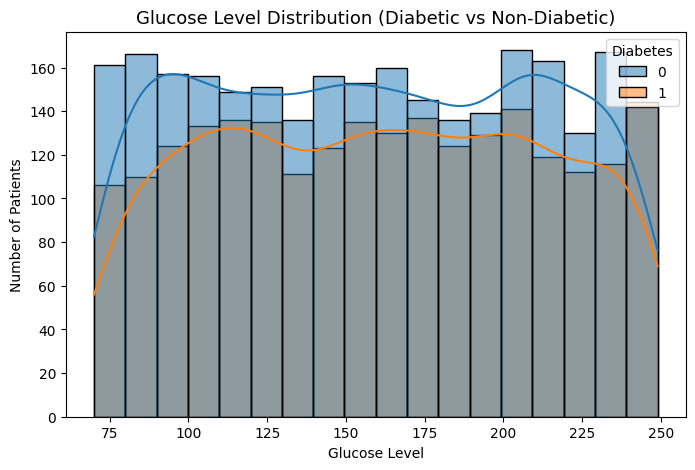

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose_Level", hue="Diabetes", kde=True)
plt.title("Glucose Level Distribution (Diabetic vs Non-Diabetic)", fontsize=13)
plt.xlabel("Glucose Level")
plt.ylabel("Number of Patients")
plt.show()

This scatter plot shows the relationship between BMI and Age.
# Generally, older patients with higher BMI tend to have diabetes more often.

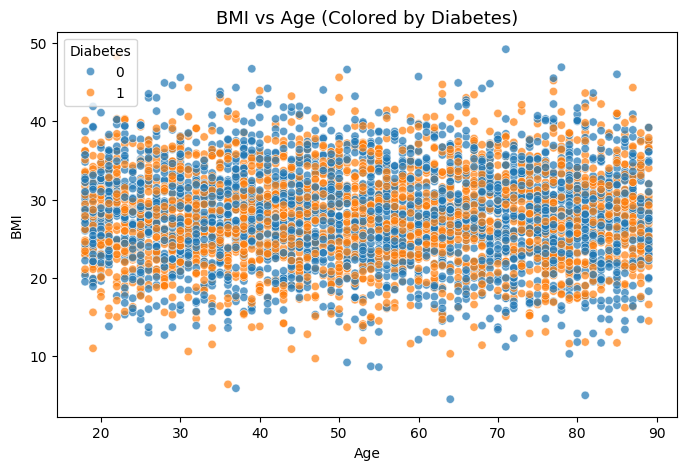

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="BMI", hue="Diabetes", alpha=0.7)
plt.title("BMI vs Age (Colored by Diabetes)", fontsize=13)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()